    JACOB KNOPPING
    1/27/20
    
### 20.7 CHALLENGE
    
Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

### SOLUTION

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline

In [2]:
titanic_1 = pd.read_csv('titanic_train.csv')
titanic_2 = pd.read_csv('titanic_test.csv')
titanic_3 = pd.read_csv('titanic_gender_submission.csv')

#### Data cleaning

In [3]:
print(len(titanic_1))
print(titanic_1.columns)
print(titanic_1.isnull().sum())
#will drop cabin after joining all dfs
titanic_1.interpolate(inplace=True)
titanic_1.fillna(titanic_1.mode().iloc[0],inplace=True)
print(titanic_1.isnull().sum())

891
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [4]:
print(len(titanic_2))
print(titanic_2.columns)
print(titanic_2.isnull().sum())
titanic_2.interpolate(inplace=True)
titanic_2.fillna(titanic_2.mode().iloc[0],inplace=True)
print(titanic_2.isnull().sum())

418
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
print(len(titanic_3))
print(titanic_3.columns)
print(titanic_3.isnull().sum())

418
Index(['PassengerId', 'Survived'], dtype='object')
PassengerId    0
Survived       0
dtype: int64


In [6]:
titanic_2_3 = pd.concat((titanic_2, titanic_3.Survived), axis=1)
print(len(titanic_2_3))
print(titanic_2_3.columns)
print(titanic_2_3.isnull().sum())

418
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64


In [7]:
titanic_1_survived = titanic_1[['PassengerId', 'Survived']]
print(len(titanic_1_survived))
print(titanic_1_survived.columns)
print(titanic_1_survived.isnull().sum())

891
Index(['PassengerId', 'Survived'], dtype='object')
PassengerId    0
Survived       0
dtype: int64


In [8]:
titanic_1 = titanic_1.drop(columns=['Survived'])
titanic_1 = pd.concat((titanic_1, titanic_1_survived['Survived']), axis=1)
print(len(titanic_1))
print(titanic_1.columns)
print(titanic_1.isnull().sum())

891
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64


In [9]:
#titanic_1 = titanic_1.set_index('PassengerId')
#titanic_2_3 = titanic_2_3.set_index('PassengerId')


frames = [titanic_1, titanic_2_3]
titanic_df = pd.concat(frames)
#drop cabin (had many missing values)
titanic_df = titanic_df.drop(columns=['Cabin'])

#titanic_df = pd.concat((titanic_1, titanic_2_3), axis=1)
print(len(titanic_df))
print(titanic_df.columns)
print(titanic_df.isnull().sum())

1309
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64


In [10]:
categorical = titanic_df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Name
1307
Sex
2
Ticket
929
Embarked
3


In [11]:
titanic_df = titanic_df.drop(columns=['Name', 'Ticket'])

#### EDA and Feature Engineering

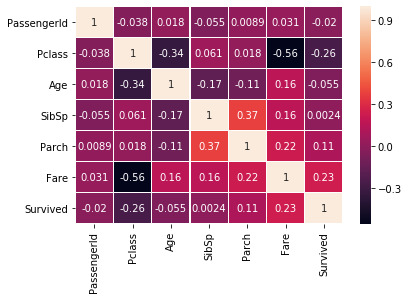

In [12]:
import seaborn as sns

corr = titanic_df.corr()
sns.heatmap(corr, annot=True, linewidths=.2)
plt.show()

Correlations are relatively low.

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']


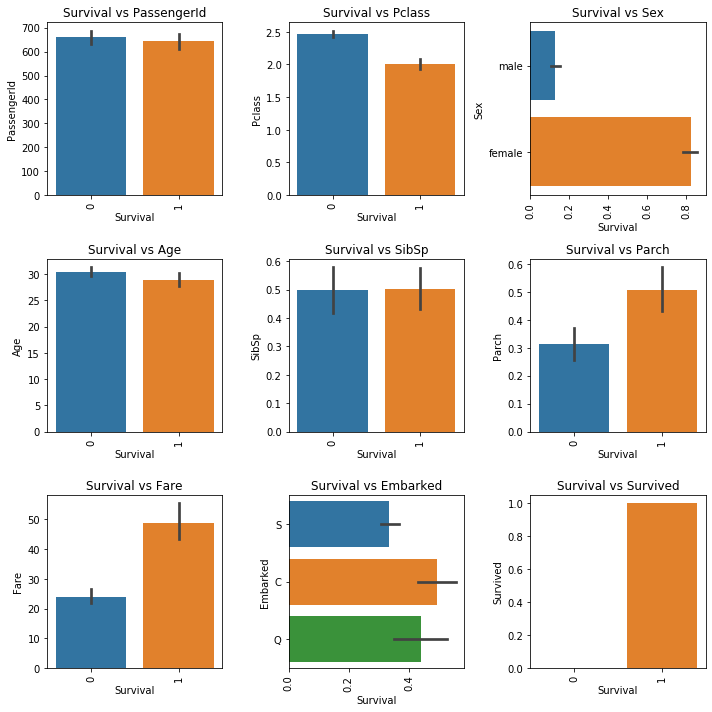

In [13]:
import seaborn as sns

fill_list = list(titanic_df.columns)
print(fill_list)

#fill_list = list(titanic_df.columns)


plt.figure(figsize=(10,10))

for index, column in enumerate(fill_list):
    #There are now 38 non-numeric columns
    plt.subplot(3,3,index+1)
    sns.barplot(x="Survived", y=column, data=titanic_df)
    plt.title("Survival vs {}".format(column))
    plt.xlabel("Survival")
    plt.ylabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


Features that appear to have significance include: Sex, Parch, Fare, and Embarked.

#### Decision Tree

In [14]:
titanic_df = titanic_df.drop(columns=['PassengerId', 'Pclass', 'Age', 'SibSp'])

In [15]:
titanic_df.head()

,Sex,Parch,Fare,Embarked,Survived
0,male,0,7.2500,S,0
1,female,0,71.2833,C,1
2,female,0,7.9250,S,1
3,female,0,53.1000,S,1
4,male,0,8.0500,S,0


In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Sex         1309 non-null object
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
Survived    1309 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 101.4+ KB


In [17]:
a = pd.get_dummies(titanic_df[['Sex', 'Embarked']])
#print(a)
b = titanic_df[['Parch', 'Fare']]
#print(b)

#titanic_2_3 = pd.concat((titanic_2, titanic_3.Survived), axis=1)
features_df = pd.concat((a, b), axis=1)
#print(features_df)

In [18]:
# Set up timer.
from datetime import datetime
start_time = datetime.now()

# Move on to set up decision tree.
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

# Set up variables.
X = features_df
Y = titanic_df[['Survived']]


#print(X)
#print(Y)

# Initialize and train our tree.
decision_tree = tree.DecisionTreeRegressor()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5#,
    #random_state = 1337
)

decision_tree.fit(X, Y)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.008981


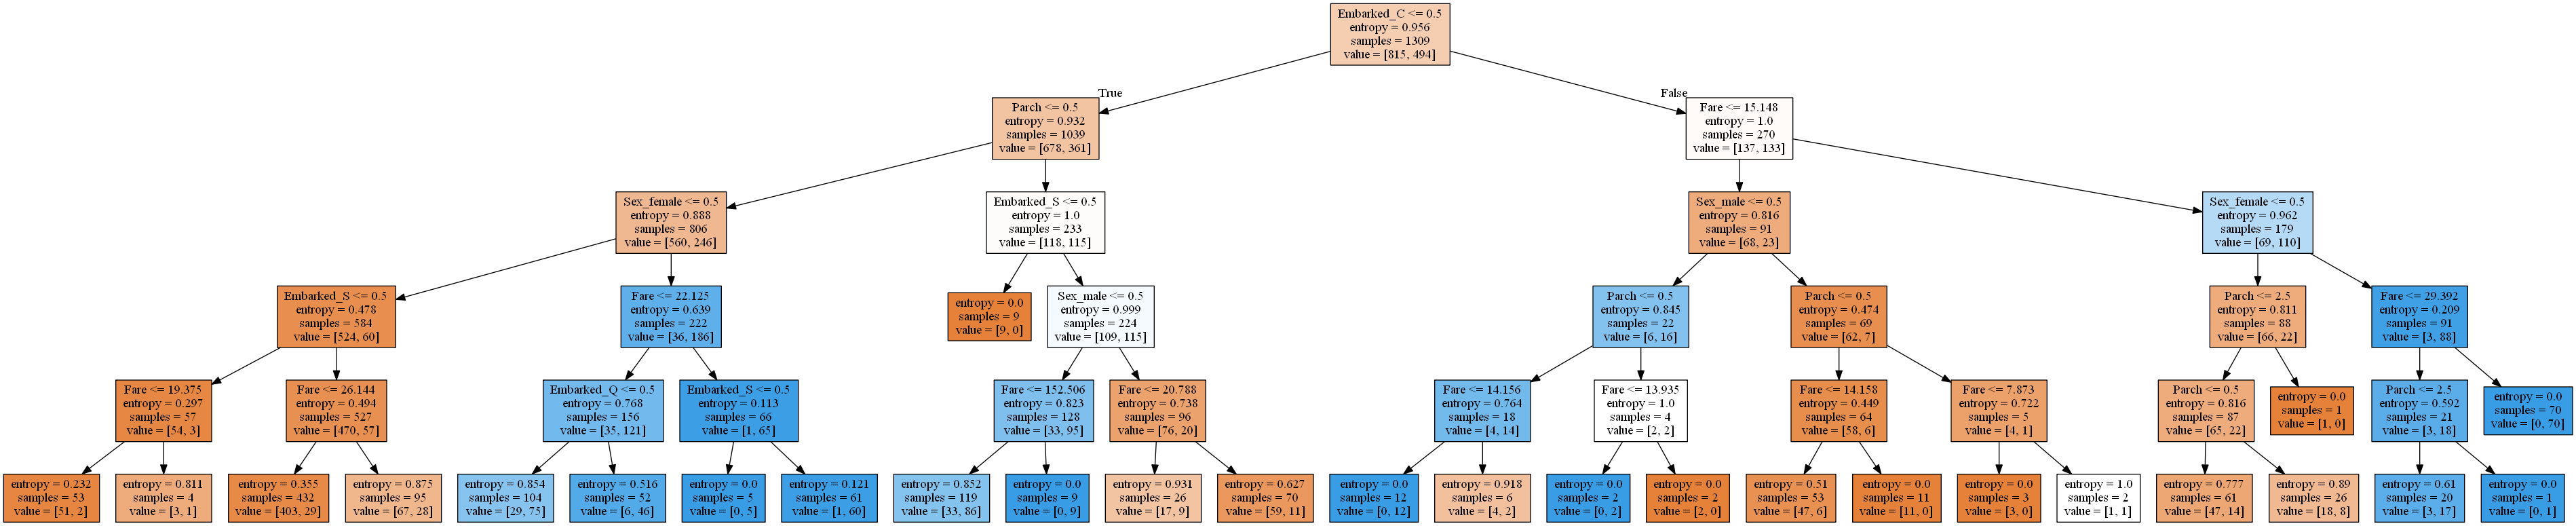

In [19]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features_df.columns,
    #class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [20]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(decision_tree, X, Y, cv=10)
print('Cross val scores:', cvs)
print('\n Avg score:', cvs.mean())

Cross val scores: [0.79545455 0.78030303 0.84090909 0.75       0.71755725 0.78461538
 0.83076923 0.94615385 0.99230769 0.94615385]

 Avg score: 0.8384223918575063


In [21]:
print(decision_tree.score(X,Y))

0.8601986249045073


#### Random Forest Model

In [22]:
start_time = datetime.now()

from sklearn import ensemble
rfc = ensemble.RandomForestRegressor()
rfc.fit(X, Y)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.023940


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [23]:
print(rfc.score(X,Y))

0.7460165713100972


In [24]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rfc, X, Y, cv=10)
print('Cross val scores:', cvs)
print('\n Avg score:', cvs.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

Cross val scores: [0.20910331 0.21047054 0.46525263 0.43586458 0.33197446 0.35773474
 0.43780799 0.69192591 0.68136874 0.75123599]

 Avg score: 0.4572738884147416


#### Results

The accuracy of the decision tree is approximately 83% after cross fold validation. Meanhwile the accuracy after cross fold validation for the random forest model is just below 50% (in contrast to the accurcay being approximately 75% without cross fold validation). In this instance, the random forest model appears to overfit. However, the decision tree holds up as a decent model.

For both models, runtime was extremely fast and neglible. Typically, one would expect the random forest model to be more accurate, but have a longer runtime. In this instance, this was not the case, perhaps due to the simplicity of this particular model. 